In [1]:
#Блок в рамках которого импотряться математические подсчеты, падас и нампай
import pandas as pd
import numpy as np
from scipy.stats import iqr
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats
import scipy as sp
import scipy.stats as stats


import os
#Блок в рамках которого импотряться графики
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
sns.set_style('darkgrid')


#Блок в рамках которого импотряться статистические пакеты
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt, het_breuschpagan
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.stats.diagnostic import compare_encompassing 

In [2]:
# making "directoryback"
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))

# Квантильная регрессия

In [21]:
data = pd.read_csv('Data/PhonesDF_years_corrected_v2.csv')
X_columns = list(data.drop(columns=['log_price', 'phone_title', 'specs_score']).columns)
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)

In [20]:
X_columns

['rating',
 'disp_diag',
 'camera',
 'storage',
 'ram',
 'battery_capacity',
 'disp_height',
 'disp_width',
 'oper_syst_vers',
 'year_of_release',
 'density',
 'Other_oper_syst',
 'IOS_oper_syst',
 'battery_type_LiPo',
 'brand_Apple',
 'brand_BlackBerry',
 'brand_Cubot',
 'brand_Gionee',
 'brand_Google',
 'brand_HTC',
 'brand_Honor',
 'brand_Huawei',
 'brand_Infinix',
 'brand_LG',
 'brand_Lava',
 'brand_Lenovo',
 'brand_Motorola',
 'brand_Nokia',
 'brand_OnePlus',
 'brand_Oppo',
 'brand_Realme',
 'brand_Samsung',
 'brand_Sony',
 'brand_Tecno',
 'brand_Vivo']

Заметим, что из EDA мы знаем, что распределение логарифма цены смартфонов имеет правостороннюю асимметрию, поэтому имеет смысл применить квантильную регрессию для оценки условной медианы соответсвующей цены.

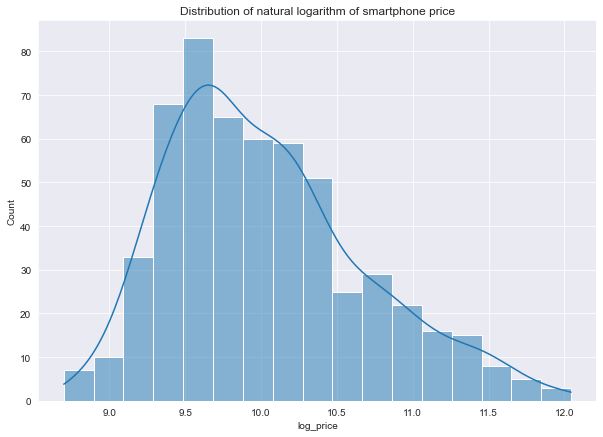

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=data, x='log_price', ax=ax,  kde=True)
ax.set_title('Distribution of natural logarithm of smartphone price');

 Оценим квантильную регрессию для квантилей логарифма цены смартофна уровней 0.1, 0.5, 0.9.

In [5]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res = mod.fit(q=0.1, max_iter=10000)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.2184
Model:                       QuantReg   Bandwidth:                      0.2834
Method:                 Least Squares   Sparsity:                        1.613
Date:                Tue, 09 May 2023   No. Observations:                  559
Time:                        15:41:35   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0017      0.001      1.523      0.128      -0.000       0.004
rating               -0.0126      0.036     -0.352      0.725      -0.083       0.058
disp_diag             0.2232      0.076      2.947      0.003       0.074       0.372
camera                0.0112      0.004      2.832      0.005       0.003       0.019
storage               0.0023      0.000      4.760      0.000       0.001       0.003
ram                   0.0028      0.015      0.190      0.850      -0.027       0.032
battery_capacity     -0.0001   4.69e-05     -3.018      0.003      -0.000   -4.94e-05
year_of_release       0.0041      0.000     21.049      0.000       0.004       0.004
density            7.303e-07   9.64e-07      0.757      0.449   -1.16e-06    2.62e-06
Other_oper_syst     3.15e-05      0.235      0.000      1.000      -0.461       0.461
battery_type_LiPo     0.0317      0.060      0.525      0.600      -0.087       0.150
brand_Apple          -0.0003      0.113     -0.002      0.998      -0.223       0.222
brand_BlackBerry      0.2030      0.247      0.822      0.411      -0.282       0.688
brand_Cubot       -2.399e-05      0.119     -0.000      1.000      -0.234       0.234
brand_Gionee          0.3774      0.734      0.514      0.607      -1.064       1.819
brand_Google         -0.0003      0.102     -0.003      0.997      -0.200       0.199
brand_HTC             0.0161      0.135      0.119      0.905      -0.248       0.281
brand_Honor       -4.039e-05      0.103     -0.000      1.000      -0.202       0.202
brand_Huawei         -0.0684      0.092     -0.747      0.455      -0.248       0.111
brand_Infinix         0.0061      0.115      0.053      0.958      -0.219       0.232
brand_LG              0.2432      0.185      1.312      0.190      -0.121       0.607
brand_Lava           -0.4077      0.734     -0.555      0.579      -1.850       1.034
brand_Lenovo          0.0025      0.153      0.016      0.987      -0.297       0.302
brand_Motorola    -5.649e-05      0.111     -0.001      1.000      -0.218       0.218
brand_Nokia          -0.0153      0.135     -0.113      0.910      -0.281       0.251
brand_OnePlus        -0.0002      0.092     -0.002      0.998      -0.181       0.180
brand_Oppo           -0.1624      0.115     -1.416      0.157      -0.388       0.063
brand_Realme          0.0027      0.149      0.018      0.986      -0.290       0.296
brand_Samsung         0.1738      0.086      2.010      0.045       0.004       0.344
brand_Sony            0.2520      0.195      1.293      0.196      -0.131       0.635
brand_Tecno           0.0258      0.113      0.229      0.819      -0.196       0.247
brand_Vivo            0.5461      0.310      1.763      0.079      -0.063       1.155
=====================================================================================

The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видно, что в отличие от OLS с робастными ошибками в форме Уайта, в данном случае коэффициент при рейтинге, оперативной памяти, плотности экрана, а также при большинстве брендов - незначимы на любом разумном уровне значимости. В то время как коэффициент при емкости батареи и диагонале дисплея стали значимыми на любом разумном уровне значимости. Это можно объяснить тем, что квантиль уровня 0.1 в каком-то смысле является чем-то в духе нижней оценки цены телефона, имеющего заданные характеристики, поэтому со стороны спроса ее определяют в основном наиболее понятные и имеющие первоочередную важность для потребителя характеристики, а со стороны предложения - цены основных комплектующих.

В таком случае рейтинг смартфона в интернет-магазине не будет играть большой роли, поэтому он и оказывается незначимым, а год выпуска является инсрументом, отражающим качество комплектующих используемых в производстве, поэтому он оказывается значимым. Также логично ожидать, что нижняя оценка цены смартфона не привязана к бренду, так как потребители в большинстве смотрят на него не в первую очередь.

Теперь оценим моду условного распределения логарифма цены смартофна

In [10]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res = mod.fit(q=0.5, max_iter=10**5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.3729
Model:                       QuantReg   Bandwidth:                      0.1943
Method:                 Least Squares   Sparsity:                       0.7589
Date:                Tue, 09 May 2023   No. Observations:                  559
Time:                        15:43:23   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0026      0.001      4.736      0.000       0.002       0.004
rating                0.0561      0.024      2.343      0.019       0.009       0.103
disp_diag             0.1139      0.056      2.039      0.042       0.004       0.224
camera                0.0038      0.002      1.578      0.115      -0.001       0.009
storage               0.0024      0.000      7.650      0.000       0.002       0.003
ram                   0.0615      0.010      6.287      0.000       0.042       0.081
battery_capacity  -4.896e-05   3.39e-05     -1.444      0.149      -0.000    1.77e-05
year_of_release       0.0042      0.000     31.146      0.000       0.004       0.004
density            3.661e-06   6.87e-07      5.332      0.000    2.31e-06    5.01e-06
Other_oper_syst       0.0012      0.296      0.004      0.997      -0.580       0.583
battery_type_LiPo     0.0254      0.044      0.577      0.564      -0.061       0.112
brand_Apple           0.7911      0.101      7.853      0.000       0.593       0.989
brand_BlackBerry     -0.1490      0.138     -1.083      0.279      -0.419       0.121
brand_Cubot           0.1973      0.198      0.995      0.320      -0.192       0.587
brand_Gionee          0.0002      0.273      0.001      1.000      -0.536       0.536
brand_Google         -0.0021      0.128     -0.016      0.987      -0.253       0.249
brand_HTC            -0.0858      0.085     -1.013      0.312      -0.252       0.081
brand_Honor           0.0011      0.176      0.006      0.995      -0.345       0.348
brand_Huawei         -0.1132      0.065     -1.750      0.081      -0.240       0.014
brand_Infinix        -0.2156      0.079     -2.727      0.007      -0.371      -0.060
brand_LG              0.3269      0.120      2.736      0.006       0.092       0.562
brand_Lava        -9.582e-05      0.277     -0.000      1.000      -0.545       0.545
brand_Lenovo         -0.1426      0.125     -1.146      0.252      -0.387       0.102
brand_Motorola        0.3815      0.166      2.305      0.022       0.056       0.707
brand_Nokia          -0.1149      0.096     -1.201      0.230      -0.303       0.073
brand_OnePlus         0.4205      0.109      3.852      0.000       0.206       0.635
brand_Oppo           -0.0645      0.082     -0.784      0.433      -0.226       0.097
brand_Realme         -0.2021      0.101     -2.000      0.046      -0.401      -0.004
brand_Samsung         0.0689      0.057      1.202      0.230      -0.044       0.182
brand_Sony            0.0259      0.128      0.202      0.840      -0.225       0.277
brand_Tecno          -0.1181      0.077     -1.531      0.126      -0.270       0.033
brand_Vivo            0.0789      0.177      0.445      0.656      -0.269       0.427
=====================================================================================

The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Заметим, что теперь коэффициент при рейтинге смартофна стал значимым на 5% уровне значимости, а при переменной, отвечающей за год выпуска сматофна, по-прежнему остался значимым на любом разумном уровне значимости. При брендах Apple, OnePlus, LG, Infinix коэффициенты - значимы на любом разумном уровне значимости. Также заметим, что перед количеством мегапикселей камеры коэффициент получился незначимым на любом разумном уровне значимости.

In [12]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res = mod.fit(q=0.9, max_iter=10**5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.4200
Model:                       QuantReg   Bandwidth:                      0.2243
Method:                 Least Squares   Sparsity:                        2.260
Date:                Tue, 09 May 2023   No. Observations:                  559
Time:                        15:43:37   Df Residuals:                      527
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0004      0.001     -0.308      0.758      -0.003       0.002
rating                0.1182      0.050      2.375      0.018       0.020       0.216
disp_diag            -0.0494      0.134     -0.368      0.713      -0.313       0.214
camera                0.0086      0.005      1.857      0.064      -0.001       0.018
storage               0.0023      0.001      3.729      0.000       0.001       0.004
ram                   0.0634      0.015      4.347      0.000       0.035       0.092
battery_capacity  -6.502e-05    7.2e-05     -0.903      0.367      -0.000    7.64e-05
year_of_release       0.0049      0.000     15.273      0.000       0.004       0.006
density            4.433e-06   1.21e-06      3.678      0.000    2.07e-06     6.8e-06
Other_oper_syst      -0.1039      1.072     -0.097      0.923      -2.211       2.003
battery_type_LiPo     0.0406      0.089      0.453      0.651      -0.135       0.216
brand_Apple           0.7278      0.235      3.097      0.002       0.266       1.189
brand_BlackBerry     -0.0016      0.301     -0.005      0.996      -0.592       0.589
brand_Cubot        9.758e-07      0.154   6.35e-06      1.000      -0.302       0.302
brand_Gionee      -2.914e-07      0.177  -1.64e-06      1.000      -0.348       0.348
brand_Google          0.5635      0.287      1.962      0.050      -0.001       1.128
brand_HTC            -0.2895      0.173     -1.678      0.094      -0.629       0.050
brand_Honor           0.4124      0.423      0.976      0.330      -0.418       1.243
brand_Huawei         -0.1346      0.123     -1.093      0.275      -0.377       0.107
brand_Infinix        -0.5574      0.153     -3.653      0.000      -0.857      -0.258
brand_LG          -8.215e-07      0.237  -3.47e-06      1.000      -0.465       0.465
brand_Lava          1.64e-08      0.209   7.83e-08      1.000      -0.411       0.411
brand_Lenovo       2.902e-06      0.110   2.64e-05      1.000      -0.216       0.216
brand_Motorola     8.616e-06      0.486   1.77e-05      1.000      -0.955       0.955
brand_Nokia          -0.5543      0.191     -2.896      0.004      -0.930      -0.178
brand_OnePlus         0.0740      0.219      0.338      0.736      -0.356       0.505
brand_Oppo           -0.3354      0.161     -2.086      0.037      -0.651      -0.020
brand_Realme          0.0080      0.180      0.044      0.965      -0.345       0.361
brand_Samsung        -0.0412      0.102     -0.403      0.687      -0.242       0.160
brand_Sony            0.0464      0.293      0.158      0.874      -0.530       0.623
brand_Tecno           0.0819      0.138      0.592      0.554      -0.190       0.353
brand_Vivo         3.156e-06      0.133   2.38e-05      1.000      -0.261       0.261
=====================================================================================

The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Так как мы оцениваем квантиль уровня 0.9, то можно думать, что мы оцениваем, что определеяет верхнюю оценку цены смартфона с заданными характеристиками.

Ситуация с коэффициентами при рейтинге и годом выпуска смартфона повторяется - они оба значимы на 5% уровне значимости. Большинство брендов, наоборот, оказывают статистически незначимый эффект на цену смартфона, однако есть и контрпримеры: Apple, Google, Infinix, Nokia, Oppo.

Теперь посмотрим, как меняются оценки коэффициентов перед rating, disp_diag, brand_Samsung и brand_Apple при имзенении квантилей.

In [70]:
features = ['rating', 'year_of_release', 'brand_OnePlus', 'brand_Apple']
quantiles = np.linspace(0.05, 0.96, 20)


def fit_model(q):
    res = mod.fit(q=q, max_iter=10**5)
    ans = [q]
    for item in features:
        ans.extend([res.params[item]] + res.conf_int().loc[item].tolist())
    return ans

models = [fit_model(x) for x in quantiles]
cols = ['q']
for i, item in enumerate(features):
    cols.extend([f'x_{i}', f'lx_{i}', f'ux_{i}'])
models = pd.DataFrame(models, columns=cols)

print(models)


c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


           q       x_0      lx_0      ux_0       x_1      lx_1      ux_1  \
0   0.050000  0.011714 -0.066477  0.089905  0.004082  0.003621  0.004542   
1   0.097895 -0.021934 -0.086712  0.042845  0.004055  0.003708  0.004403   
2   0.145789 -0.016260 -0.094501  0.061981  0.004332  0.003927  0.004737   
3   0.193684  0.001451 -0.056808  0.059711  0.004230  0.003915  0.004545   
4   0.241579  0.017827 -0.032616  0.068269  0.004242  0.003968  0.004517   
5   0.289474  0.023522 -0.029516  0.076560  0.004133  0.003845  0.004420   
6   0.337368  0.033655 -0.015625  0.082936  0.004106  0.003834  0.004379   
7   0.385263  0.035224 -0.011658  0.082106  0.004357  0.004097  0.004617   
8   0.433158  0.052651  0.008263  0.097038  0.004299  0.004051  0.004547   
9   0.481053  0.039373 -0.006715  0.085461  0.004376  0.004117  0.004636   
10  0.528947  0.055025  0.007113  0.102937  0.004484  0.004211  0.004756   
11  0.576842  0.049605  0.002966  0.096244  0.004530  0.004263  0.004797   
12  0.624737

c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


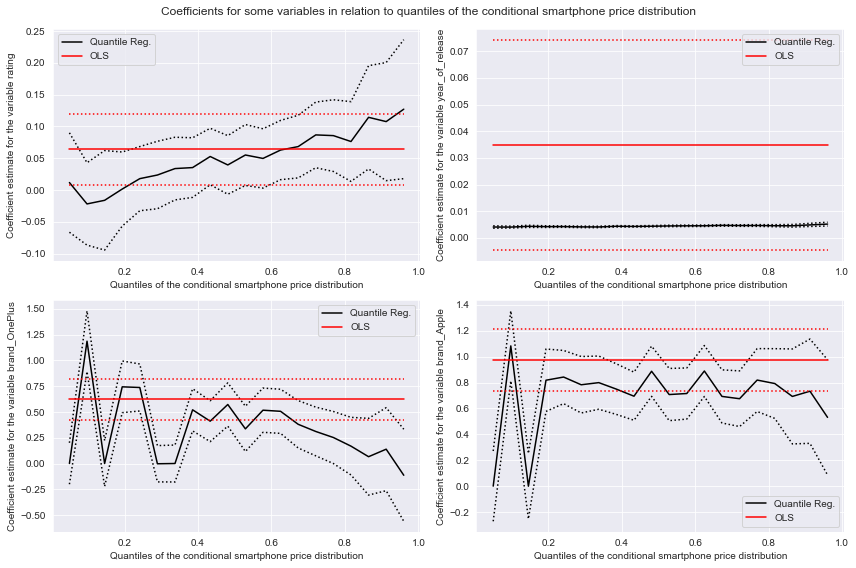

In [158]:
cols = list(data.drop(columns='log_price').columns)
idx_features = [cols.index(feature) for feature in features]

ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()
i = 0
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for idx, item in zip(idx_features, features):
    ols_ci = ols.conf_int()[idx + 1 , :].tolist()
    ols_dict = dict(
    x=ols.params[idx + 1], lx=ols_ci[0], ux=ols_ci[1]
    )
    print()
    ax_cur = ax[i // 2][i % 2]
    n = models.shape[0]
    p1 = ax_cur.plot(models.q, models[f'x_{i}'], color="black", label="Quantile Reg.")
    p2 = ax_cur.plot(models.q, models[f'ux_{i}'], linestyle="dotted", color="black")
    p3 = ax_cur.plot(models.q, models[f'lx_{i}'], linestyle="dotted", color="black")
    p4 = ax_cur.plot(models.q, [ols_dict["x"]] * n, color="red", label="OLS")
    p5 = ax_cur.plot(models.q, [ols_dict["lx"]] * n, linestyle="dotted", color="red")
    p6 = ax_cur.plot(models.q, [ols_dict["ux"]] * n, linestyle="dotted", color="red")
    ax_cur.set_ylabel(f'Coefficient estimate for the variable {item}')
    ax_cur.set_xlabel("Quantiles of the conditional smartphone price distribution")
    ax_cur.legend()
    i += 1
fig.suptitle('Coefficients for some variables in relation to quantiles of the conditional smartphone price distribution')
plt.tight_layout();

Видно, что в с ростом уровня оцениваемого квантиля растет и коэффициент при рейтинге смартфона, то есть рейтинг в большей степени определяет верхнюю границу цены, которая может быть на него установлена, нежели ограничивает цену снизу. Оценка коэффициента при годе выпуска практически не меняется с изменением уровня квантиля, причем OLS-оценка данного коэффициента существенно превышает QR-оценку.

Оценка коэффициента при бренде OnePlus почти для всех квантилей ниже, чем соответсвующая МНК-оценка, то же верно и для бренда Apple. Это можно объяснить тем, что квантильная регрессия менее чувствительна к выбросам, а в датасете как раз были телефоны брендов Apple и OnePlus с очень высокой ценой.

# Прогноз

In [39]:
X_columns

['rating',
 'disp_diag',
 'camera',
 'storage',
 'ram',
 'battery_capacity',
 'year_of_release',
 'density',
 'Other_oper_syst',
 'battery_type_LiPo',
 'brand_Apple',
 'brand_BlackBerry',
 'brand_Cubot',
 'brand_Gionee',
 'brand_Google',
 'brand_HTC',
 'brand_Honor',
 'brand_Huawei',
 'brand_Infinix',
 'brand_LG',
 'brand_Lava',
 'brand_Lenovo',
 'brand_Motorola',
 'brand_Nokia',
 'brand_OnePlus',
 'brand_Oppo',
 'brand_Realme',
 'brand_Samsung',
 'brand_Sony',
 'brand_Tecno',
 'brand_Vivo']

In [22]:
ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()

Возьмем характеристики [Xiaomi Poco X3 6GB/64GB](http://web.archive.org/web/20211201100938mp_/https://www.priceinkenya.com/product/xiaomi-poco-x3-6gb64gb), [OnePlus 9R 12GB/256GB](http://web.archive.org/web/20210420125400mp_/https://www.priceinkenya.com/product/oneplus-9r-12gb256gb), [Apple iPhone SE (2020) 256GB](http://web.archive.org/web/20211024223817mp_/https://www.priceinkenya.com/product/apple-iphone-se-2020-256gb)

In [62]:
# specs_score = 62%
char = np.array([
    [5, 6.67, 20, 64, 6, 6000, 2020, 1080*2400 / (6.67)**2, 0, 0] + [0] * 21,
    [3, 6.55, 16, 256, 12, 4500, 2021, 1080*2400 / (6.55)**2, 0, 0] + [0] * 21,
    [4.5, 4.7, 12, 256, 3, 1821, 2020, 750*1334 / (4.7)**2, 0, 0] + [0] * 21,
    ])
char[1, 24] = 1
char[2, 10] = 1
logprice_true = np.log([25499, 68999, 72000])
df_new = pd.DataFrame(char)
df_new.columns = X_columns.copy()
df_new

,rating,disp_diag,camera,storage,ram,battery_capacity,year_of_release,density,Other_oper_syst,battery_type_LiPo,...,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OnePlus,brand_Oppo,brand_Realme,brand_Samsung,brand_Sony,brand_Tecno,brand_Vivo
0,5.0,6.67,20.0,64.0,6.0,6000.0,2020.0,58261.723711,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,6.55,16.0,256.0,12.0,4500.0,2021.0,60416.059670,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,4.70,12.0,256.0,3.0,1821.0,2020.0,45291.987325,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Прогноз OLS

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
for item, jtem in zip(logprice_true, ols.predict(df_new)):
    print('Predicted expectation of log_price =', jtem)
    print('Real price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(ols.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(ols.predict(df_new))))

Predicted expectation of log_price = 10.024522916414604
Real price = 10.146394514691288

Predicted expectation of log_price = 11.342617192841743
Real price = 11.141847290720753

Predicted expectation of log_price = 11.293928414704453
Real price = 11.184421397998193

MSE = 0.02238434225736356
MAE = 0.1440495057013115


#### Прогноз QR

In [64]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.1, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted quantile level 0.1 of log_price =', jtem)
    print('True log_price =', item)
    print()

Predicted quantile level 0.1 of log_price = 9.324803243664006
True log_price = 10.146394514691288

Predicted quantile level 0.1 of log_price = 9.930097424904996
True log_price = 11.141847290720753

Predicted quantile level 0.1 of log_price = 9.752839285672618
True log_price = 11.184421397998193



In [68]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.5, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted median log_price =', jtem)
    print('True log_price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(mod.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(mod.predict(df_new))))

Predicted median log_price = 10.122816656127124
True log_price = 10.146394514691288

Predicted median log_price = 11.277744013391438
True log_price = 11.141847290720753

Predicted median log_price = 11.155340077698385
True log_price = 11.184421397998193

MSE = 0.006623185945828242
MAE = 0.06285196717821862


In [66]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.9, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted quantile level 0.9 of log_price =', jtem)
    print('True log_price =', item)
    print()

Predicted quantile level 0.9 of log_price = 10.783334245997258
True log_price = 10.146394514691288

Predicted quantile level 0.9 of log_price = 11.576300343403052
True log_price = 11.141847290720753

Predicted quantile level 0.9 of log_price = 11.997931885750564
True log_price = 11.184421397998193



c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
